<a href="https://colab.research.google.com/github/wel51x/DS-Unit-4-Sprint-4-Deep-Learning/blob/master/My_LS_DS_Unit_4_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

## *Data Science Unit 4 Sprint 4*

# Sprint Challenge
### RNNs, CNNs, GANS, and AutoML

In this Sprint Challenge, you'll explore some of the cutting edge of Data Science. *Caution* - these approaches can be pretty heavy computationally. All problems are designed to completed with 5-10 minutes of run time on most machines. If you approach takes longer, please double check your work. 

## Part 1 - RNNs

Use an RNN to fit a classification model on tweets to distinguish from tweets from any two accounts. The following code sample illustrates how to access data from an account (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper): 

In [56]:
!pip install twitterscraper

In [1]:
# Imports and constants
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from twitterscraper import query_tweets
from PIL import Image, ImageOps

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.callbacks import LambdaCallback, ModelCheckpoint
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

max_tweet_len = 280
rnn_batch_size = 32

Using TensorFlow backend.


In [58]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen',1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-16', 'from:austen since:2006-11-16 until:2007-07-14', 'from:austen since:2007-07-14 until:2008-03-10', 'from:austen since:2008-03-10 until:2008-11-06', 'from:austen since:2008-11-06 until:2009-07-04', 'from:austen since:2009-07-04 until:2010-03-01', 'from:austen since:2010-03-01 until:2010-10-27', 'from:austen since:2010-10-27 until:2011-06-25', 'from:austen since:2011-06-25 until:2012-02-20', 'from:austen since:2012-02-20 until:2012-10-17', 'from:austen since:2012-10-17 until:2013-06-14', 'from:austen since:2013-06-14 until:2014-02-10', 'from:austen since:2014-02-10 until:2014-10-08', 'from:austen since:2014-10-08 until:2015-06-05', 'from:austen since:2015-06-05 until:2016-01-31', 'from:austen since:2016-01-31 until:2016-09-28', 'from:austen since:2016-09-28 until:2017-05-26', 'from:austen since:2017-05-26 until:2018-01-21', 'from:austen since:2018-01-21 until:2018-09-18', 'from:austen since:2018-09-18 until:2019-05-17']
INFO

181

In [4]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

Your Tasks:
* Select two twitter accounts to gather data from
* Use twitterscraper to get ~1,000 tweets from each account
* Encode the characters to a sequence of integers for the model
* Get the data into the appropriate shape/format, including labels and a train/test split
* Use Keras to fit a predictive model, classying tweets as being from one acount or the other
* Report your overall score and accuracy

For reference, the [Keras IMDB classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the RNN code we used in class.

Note - focus on getting a running model, not on making accuracy with extreme data size or epoch numbers. Fit a baseline model based on tweet text. Only revisit and push accuracy or incorporate additional features if you get everything else done!

In [59]:
# TODO - your code!
elon_tweets = query_tweets('from:elonmusk',1000)
len(elon_tweets)

INFO: queries: ['from:elonmusk since:2006-03-21 until:2006-11-16', 'from:elonmusk since:2006-11-16 until:2007-07-14', 'from:elonmusk since:2007-07-14 until:2008-03-10', 'from:elonmusk since:2008-03-10 until:2008-11-06', 'from:elonmusk since:2008-11-06 until:2009-07-04', 'from:elonmusk since:2009-07-04 until:2010-03-01', 'from:elonmusk since:2010-03-01 until:2010-10-27', 'from:elonmusk since:2010-10-27 until:2011-06-25', 'from:elonmusk since:2011-06-25 until:2012-02-20', 'from:elonmusk since:2012-02-20 until:2012-10-17', 'from:elonmusk since:2012-10-17 until:2013-06-14', 'from:elonmusk since:2013-06-14 until:2014-02-10', 'from:elonmusk since:2014-02-10 until:2014-10-08', 'from:elonmusk since:2014-10-08 until:2015-06-05', 'from:elonmusk since:2015-06-05 until:2016-01-31', 'from:elonmusk since:2016-01-31 until:2016-09-28', 'from:elonmusk since:2016-09-28 until:2017-05-26', 'from:elonmusk since:2017-05-26 until:2018-01-21', 'from:elonmusk since:2018-01-21 until:2018-09-18', 'from:elonmusk 

721

In [6]:
elon_tweets[0].text

'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'

In [60]:
len(austen_tweets + elon_tweets)

902

In [0]:
tweets_text = ''
for twt in austen_tweets:
    tweets_text += twt.text
for twt in elon_tweets:
    tweets_text += twt.text
    
chars = list(set(tweets_text))

In [9]:
# "enumerate" returns index and value, then convert to dictionary
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
print(char_to_int)
print("----------------------------------------------------")
print(int_to_char)
print("----------------------------------------------------")

{'?': 0, 'Y': 1, 'S': 2, 'l': 3, 'i': 4, '!': 5, 'M': 6, '8': 7, 'а': 8, 'X': 9, 'の': 10, 'c': 11, '逆': 12, '&': 13, '7': 14, '(': 15, 'I': 16, 'C': 17, '2': 18, 'w': 19, 'A': 20, '1': 21, 'u': 22, '…': 23, '[': 24, 'G': 25, '法': 26, 'E': 27, '\n': 28, 'B': 29, 'я': 30, ':': 31, '’': 32, '9': 33, '@': 34, 'W': 35, 'у': 36, 'F': 37, 'В': 38, 'и': 39, '4': 40, '5': 41, 'P': 42, '\xa0': 43, 'O': 44, '~': 45, '<': 46, '#': 47, 'e': 48, 'n': 49, 'г': 50, 'V': 51, '%': 52, 'R': 53, '|': 54, 'o': 55, 'd': 56, 'k': 57, 'J': 58, 'D': 59, ']': 60, 'j': 61, 'Т': 62, '=': 63, '6': 64, 'ч': 65, ';': 66, 'f': 67, 'Q': 68, '_': 69, 'т': 70, 'л': 71, 'р': 72, 'в': 73, 'ь': 74, '-': 75, 'Z': 76, 'о': 77, 'ю': 78, 'п': 79, '^': 80, 'е': 81, '√': 82, '則': 83, 'v': 84, 'с': 85, 'к': 86, 'K': 87, '転': 88, 'з': 89, 'p': 90, 'z': 91, 'L': 92, 'y': 93, 't': 94, 'x': 95, 'T': 96, '3': 97, 'У': 98, 'h': 99, 'b': 100, '$': 101, 'm': 102, ')': 103, 'U': 104, 'q': 105, 'д': 106, 'э': 107, '/': 108, ' ': 109, '.': 

In [10]:
# encode characters
austen_encode = []
for tweet in austen_tweets:
    austen_encode.append([char_to_int[char] for char in tweet.text])
elon_encode = []
for tweet in elon_tweets:
    elon_encode.append([char_to_int[char] for char in tweet.text])

print("Austen encodings:\n", austen_encode)
print(f"Number of chars: {len(austen_encode)}")
print("\nElon encodings:\n", elon_encode)
print(f"Number of chars: {len(elon_encode)}")

Austen encodings:
 [[16, 109, 3, 55, 84, 48, 109, 3, 55, 84, 48, 109, 3, 55, 84, 48, 109, 19, 55, 129, 57, 4, 49, 113, 109, 19, 4, 94, 99, 109, 113, 129, 48, 116, 94, 109, 90, 48, 55, 90, 3, 48, 110, 90, 4, 11, 110, 94, 19, 4, 94, 94, 48, 129, 110, 11, 55, 102, 108, 67, 17, 87, 44, 102, 64, 51, 3], [96, 55, 56, 116, 93, 109, 67, 55, 129, 109, 116, 3, 3, 75, 99, 116, 49, 56, 111, 109, 19, 48, 109, 19, 116, 94, 11, 99, 48, 56, 109, 116, 109, 84, 4, 56, 48, 55, 109, 55, 67, 109, 20, 116, 129, 55, 49, 118, 109, 116, 109, 40, 14, 75, 93, 48, 116, 129, 75, 55, 3, 56, 109, 102, 4, 3, 4, 94, 116, 129, 93, 109, 11, 99, 116, 90, 3, 116, 4, 49, 109, 49, 55, 19, 109, 94, 22, 129, 49, 48, 56, 109, 111, 55, 67, 94, 19, 116, 129, 48, 109, 48, 49, 113, 4, 49, 48, 48, 129, 110, 28, 28, 96, 99, 48, 109, 11, 55, 102, 90, 116, 49, 93, 109, 94, 99, 116, 94, 109, 99, 4, 129, 48, 56, 109, 99, 4, 102, 109, 3, 48, 111, 111, 109, 94, 99, 116, 49, 109, 116, 109, 93, 48, 116, 129, 109, 116, 113, 55, 109, 99, 116,

In [35]:
austen = pd.DataFrame({'encoded' : [e for e in austen_encode], 'target' : [1] * len(austen_tweets)})
elon = pd.DataFrame({'encoded' : [e for e in elon_encode], 'target' : [0] * len(elon_tweets)})
combined = pd.concat([austen, elon], ignore_index=True)

X = sequence.pad_sequences(combined.encoded, maxlen=max_tweet_len)
y = combined.target

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, stratify=y, random_state=321)
print("Train, Test shapes for X, y:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train, Test shapes for X, y: (721, 280) (181, 280) (721,) (181,)


In [36]:
model = Sequential()
model.add(Embedding(max_tweet_len, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 128)         35840     
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 167,553
Trainable params: 167,553
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
%%time
model.fit(X_train, y_train, batch_size=rnn_batch_size,
          epochs=15, validation_data=(X_test, y_test))

Train on 721 samples, validate on 181 samples
Epoch 1/15
721/721 [==============================] - 11s 15ms/step - loss: 0.5685 - acc: 0.7906 - val_loss: 0.4861 - val_acc: 0.8011
Epoch 2/15
721/721 [==============================] - 9s 12ms/step - loss: 0.4898 - acc: 0.7989 - val_loss: 0.4761 - val_acc: 0.8011
Epoch 3/15
721/721 [==============================] - 9s 13ms/step - loss: 0.4699 - acc: 0.7989 - val_loss: 0.4660 - val_acc: 0.8066
Epoch 4/15
721/721 [==============================] - 9s 13ms/step - loss: 0.4463 - acc: 0.8017 - val_loss: 0.4652 - val_acc: 0.8066
Epoch 5/15
721/721 [==============================] - 9s 12ms/step - loss: 0.4312 - acc: 0.8072 - val_loss: 0.4983 - val_acc: 0.7459
Epoch 6/15
721/721 [==============================] - 9s 12ms/step - loss: 0.4309 - acc: 0.8044 - val_loss: 0.4801 - val_acc: 0.7569
Epoch 7/15
721/721 [==============================] - 9s 12ms/step - loss: 0.4164 - acc: 0.8294 - val_loss: 0.4876 - val_acc: 0.7956
Epoch 8/15
721/721 [==

In [38]:
score_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (score_acc[1]*100))
print("Score: %.6f" % (score_acc[0]))

Test Accuracy: 80.66%
Score: 0.529098


## Part 2 - CNNs
Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [69]:
!pip install google_images_download

In [72]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {'keywords': "animal-pond", "limit": 6, "print_urls": True}
absolute_image_paths = response.download(arguments)



Item no.: 1 --> Item name = animal-pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 3.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 4.PKLS4116_inline.png
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 5.alligator-animal-on-pond.jpg
Image URL: https://cdn.pixabay.com/photo/2017/04/19/20/37/frog-2243543_960_720.jpg
Comple

At the time of writing at least a few do, but since the internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is validly run ResNet50 on the input images - don't worry about tuning or improving the model. 

*Hint:* ResNet 50 doesn't just return "frog". The three labels it has for frogs are bullfrog, tree frog, and tailed frog.

Stretch goal - also check for fish.

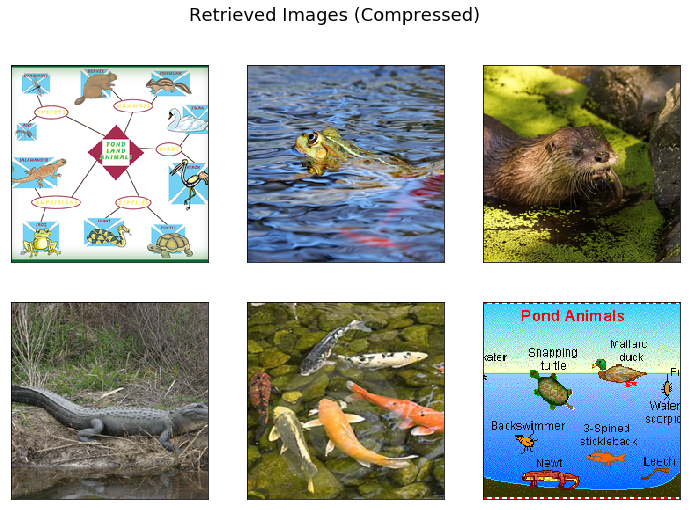

In [76]:
# TODO - your code!
import os
dir = 'downloads/animal-pond/'
files = os.listdir(dir)
figure = plt.figure(figsize=(12, 8));
figure.suptitle("Retrieved Images (Compressed)", fontsize=18)
pil_img = []
i = 0
for file in files:
  item = dir+file
  pil_image = Image.open(item)
  pil_image = ImageOps.fit(pil_image, (224, 224), Image.ANTIALIAS)
  pil_image = pil_image.convert('RGB')
  pil_img.append(pil_image)
  plt.subplot(2, 3, i+1)
  plt.imshow(np.asarray(pil_image))
  plt.xticks([])
  plt.yticks([])
  i += 1
  #pil_image.save(item, format='JPEG', quality=90)

'Image 1:'

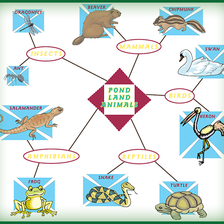

 98.28% chance: slot 
  0.47% chance: tray 
  0.21% chance: pencil_box 




'Image 2:'

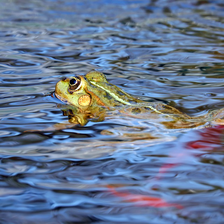

 98.60% chance: bullfrog 
  1.29% chance: tailed_frog 
  0.10% chance: tree_frog 




'Image 3:'

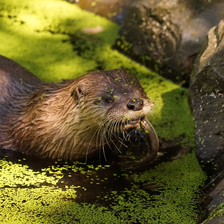

 96.78% chance: otter 
  1.89% chance: weasel 
  1.05% chance: mink 




'Image 4:'

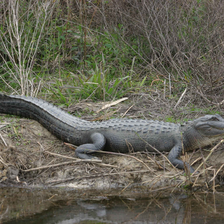

 75.99% chance: American_alligator 
 10.58% chance: water_snake 
  3.93% chance: African_crocodile 




'Image 5:'

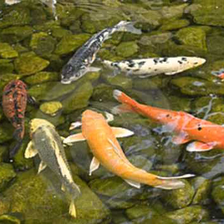

 53.82% chance: goldfish 
 40.33% chance: coho 
  1.17% chance: rock_crab 




'Image 6:'

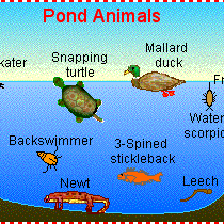

 90.98% chance: web_site 
  6.84% chance: television 
  0.43% chance: screen 




In [77]:
i = 1
for img in pil_img:
  prep_img = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
  model = ResNet50(weights='imagenet')
  features = model.predict(prep_img)
  display("Image " + str(i) + ':')
  display(img)
  for _, animal, prob in decode_predictions(features, top=3)[0]:
    print(f'{prob*100:6.2f}% chance: {animal} ')
  print('\n')
  i += 1

## Part 3 - AutoML

Use [TPOT](https://epistasislab.github.io/tpot/) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [2]:
!pip install tpot

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


As with previous questions, your goal is to run TPOT and successfully run and report error at the end. Also, in the interest of time, feel free to choose small `generation=1`and `population_size=10` parameters, so your pipeline runs efficiently. You will want to be able to iterate and test. 

*Hint:* You will have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running - as long as you still get a valid model with reasonable predictive power. 

In [4]:
# TODO - your code!
X = df.drop(columns=['id', 'date', 'yr_renovated', 'price'])
y = df.price

X.shape, y.shape

((21613, 17), (21613,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("Train, Test shapes for X, y:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train, Test shapes for X, y: (16209, 17) (5404, 17) (16209,) (5404,)


In [6]:
%%time
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=8, population_size=10, verbosity=2, n_jobs=-1)
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: -17536781933.076626
Generation 2 - Current best internal CV score: -16921372068.116978
Generation 3 - Current best internal CV score: -16921372068.116978
Generation 4 - Current best internal CV score: -16714401142.810938
Generation 5 - Current best internal CV score: -16008919832.877209
Generation 6 - Current best internal CV score: -16008919832.877209
Generation 7 - Current best internal CV score: -15795975094.696194
Generation 8 - Current best internal CV score: -15795975094.696194

Best pipeline: ExtraTreesRegressor(RandomForestRegressor(ElasticNetCV(input_matrix, l1_ratio=0.30000000000000004, tol=1e-05), bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=8, min_samples_split=5, n_estimators=100), bootstrap=False, max_features=0.55, min_samples_leaf=2, min_samples_split=9, n_estimators=100)
CPU times: user 37.2 s, sys: 1.61 s, total: 38.8 s
Wall time: 23min 37s


In [7]:
import numpy as np
RMSE = np.sqrt(-tpot.score(X_test, y_test))
print('Root Mean Square Error (RMSE): ', RMSE)

Root Mean Square Error (RMSE):  126630.00038959942


## Part 4 - More... 

Answer the following questions, with a target audience of a fellow Data Scientist:
* What do you consider your strongest area as a Data Scientist? 
* What area of Data Science would you most like to learn more about and why? 
* Where do you think Data Science will be in 5 years? 

A few sentences per answer is fine. Only elaborate if time allows. Use markdown to format your answers.

Thank you for your hard, and congratulations!! You've learned a lot, and you should proudly call yourself a Data Scientist. 

**Answers:**

*   The ability to think. It allows me to frame a problem, break it down into the relevant
components, and to devise a solution. My skepticism - including of myself - allows me
to analyze output, question assumptions and find ways to improve my solution.
*  I would like to better understand Scala/Spark (and I think Lambda could have students
do more on this end). Additionally the NLP and ML models we have been studying recently
are quite exciting and I'd like to do more on this front. Finally I'd like to see more
progress in AutoML packages such as automl-gs and TPOT, which could do much to alleviate
the pain of tuning.
*   I'm no futurist. The romantic in me would love to see AI give us a world where much of
the stress from living is alleviated by increasing the time we have for leisure without a
corresponding increase in financial insecurity. On the other hand the skeptic in me cannot
discount the possibility that AI could take us into a dystopian brave new world as was
shown as early as 1968 in the movie "Forbin: The Colossus Project". I have no idea, and
feel to a great degree that Sam Goldwyn had the best observation about predictions
and the future.



